In [1]:
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.22/06


In [2]:
fileptr = uproot.open('/depot/cms/top/bakshi3/Run2_Ntuples/susy_ntuple_full.root')

In [3]:
branch  = fileptr['writeNTuple']['NTuple']['GenParticleP4']

In [4]:
pt   = branch['GenParticleP4.fCoordinates.fPt'].array()
eta  = branch['GenParticleP4.fCoordinates.fEta'].array()
phi  = branch['GenParticleP4.fCoordinates.fPhi'].array()
mass = branch['GenParticleP4.fCoordinates.fM'].array()

In [5]:
pid     = fileptr['writeNTuple']['NTuple']['GenParticlePdgId'].array()
status  = fileptr['writeNTuple']['NTuple']['GenParticleStatus'].array()

In [6]:
i = 0
j = 21
print(pid[i][j]) 
print(pt[i][j])
print(status[i][j])

-1000006
115.7759780883789
62


In [7]:
pid[10]

array([    2212,     2212,       21,       21,  1000006, -1000006,
        1000006, -1000006,  1000006, -1000006,  1000006, -1000006,
       -1000006,  1000006, -1000006,  1000006,  1000006, -1000006,
        1000006, -1000006,  1000022,        6,  1000022,       -6,
             24,        5,        5,       24,        5,      -24,
             -5,       -5,      -24,       -5,       -5,      -11,
             12,       13,      -14,       -5,        2,     2103,
              2,       21,     2212,       -5,      511,        5,
             21,       21,       21,       -2,     -533,     2212,
           2212,     2212,      421,     -413,     -531,       11,
            -11,       11,      -11,     -421,     -433,      310,
           -431,      111,       22,       22,      310], dtype=int32)

In [14]:
status[10]

array([ 4,  4, 21, 21, 22, 22, 44, 44, 44, 44, 44, 44, 52, 44, 44, 52, 52,
       52, 62, 62,  1, 22,  1, 22, 22, 23, 51, 52, 52, 22, 23, 51, 52, 52,
       52,  1,  1,  1,  1, 73, 72, 72, 71, 71,  1, 71,  2, 71, 71, 71, 71,
       71,  2,  1,  1,  1,  2,  2,  2,  1,  1,  1,  1,  2,  2,  1,  2,  2,
        1,  1,  1], dtype=int32)

In [19]:
Ecom_stat_22 = []
for i in range(len(pt)) :
    # Gen level tops for Ecom
    top     = ROOT.TLorentzVector()
    top.SetPtEtaPhiM(pt[i][4],eta[i][4], phi[i][4],mass[i][4])

    antitop = ROOT.TLorentzVector()
    antitop.SetPtEtaPhiM(pt[i][5],eta[i][5], phi[i][5],mass[i][5])
    
    # COM energy
    com = top + antitop  # Adding the 4 vectors
    Ecom_stat_22.append(com.E())

In [8]:
Ecom_stat_62 = []

for i in range(len(pt)) :
    stop_cnt  = 0 
    astop_cnt = 0
    for j in range(len(pt[i])):
        if (pid[i][j] == 1000006)  and (stop_cnt == 0)  and (status[i][j] == 62) :
            stop_cnt += 1
            top       = ROOT.TLorentzVector()
            top.SetPtEtaPhiM(pt[i][j],eta[i][j], phi[i][j],mass[i][j])

        if (pid[i][j] == -1000006) and (astop_cnt == 0) and (status[i][j] == 62):
            astop_cnt += 1
            antitop    = ROOT.TLorentzVector()
            antitop.SetPtEtaPhiM(pt[i][j],eta[i][j], phi[i][j],mass[i][j])

        if (stop_cnt == 1 and astop_cnt == 1):
            com = top + antitop  # Adding the 4 vectors
            Ecom_stat_62.append(com.E())
            break
        else : 
            continue

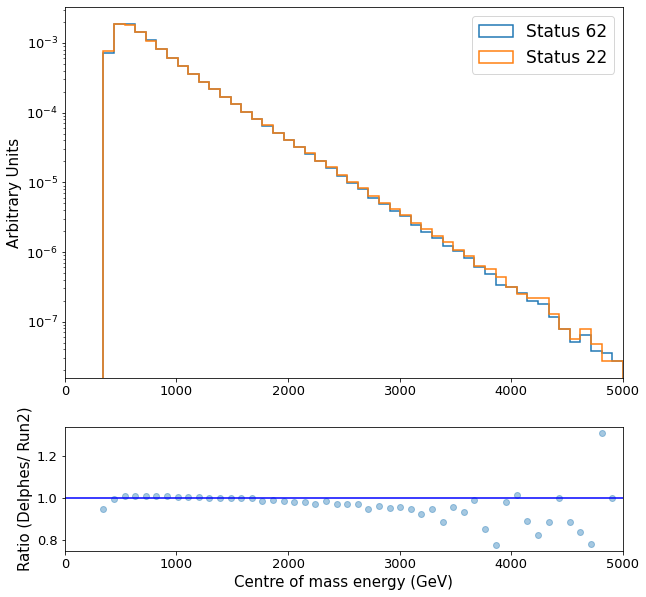

In [27]:
xlow  = 345
xhigh = 5000
nbins = 50
bins  = np.linspace(xlow,xhigh, nbins)

fig_style = {
    'figsize': (10, 10),
}

ratio_fig_style = {
    'figsize': (10, 10),
    'gridspec_kw': {'height_ratios': (3, 1)},
}


fig, (ax1, ax2)      = plt.subplots(nrows=2, **ratio_fig_style)
ns1, bins1, patches  = ax1.hist(Ecom_stat_62, density=True, histtype='step', bins=bins , label='Status 62', linewidth=1.5)
ns2, bins2, patches  = ax1.hist(Ecom_stat_22, density=True, histtype='step', bins=bins , label='Status 22', linewidth=1.5)

ax1.legend(prop={'size': 17}, loc='upper right')
ax1.set_xlim(0, xhigh)

ax2.scatter(bins[:-1],     # this is what makes it comparable
            ns1 / ns2,         # maybe check for div-by-zero!
            alpha=0.4)

ax1.set_ylabel('Arbitrary Units', fontsize=15)
ax1.set_yscale('log')
ax2.set_ylabel('Ratio (Delphes/ Run2)', fontsize=15)
ax2.set_xlabel('Centre of mass energy (GeV)', fontsize=15)
ax2.set_xlim(0,xhigh)

ax1.tick_params(axis="x", labelsize=13)
ax2.tick_params(axis="x", labelsize=13)

ax1.tick_params(axis="y", labelsize=13)
ax2.tick_params(axis="y", labelsize=13)
plt.axhline(y=1, color='b', linestyle='-')
plt.show()

In [10]:
np.savetxt('SUSY_shat_13_TeV.txt', Ecom_stat_62)